In [1]:
# Naive bayes # formula
# base formula : P(A|B) = (P(B|A)*P(A)/P(B))
# in the given above formula:
# P(A) - Prior propability
# P(X) - Marginal Likelihood
# P(B|A) - Likelihood
# P(A|B) - Posterior propability

# plan of attack # calculate both : P(Y=0|[X]) and P(Y=1|[X])
# P(Y=0) = [Y][=0]/len([Y])
# P(B) // marginal likelihood // select a radius from [X] and than calculate P(B) (number of observation in radious devided by number of total observations)
# P(B|A) // the propability of B in the observations in radious taken in calculating marginal likelihood

# Naive // [x] must have independent variables
# P(B) // assumping likelihood
# Mostly can compare the enumeator only // only for comparison from same scenario

# What happens when we have more than two classes

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
# Importing the dataset
# must make UTS/Laptop varibales
ws_sub = r"Naive Bayes"
ws = r"Data"
data_file = "Social_Network_Ads.csv"
data_file_path = os.path.join(os.path.join(os.path.join(ws, ws_sub), "data"),data_file)
dataset = pd.read_csv(data_file_path)
# dataset

In [3]:
# splitting the dataset
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values
# y

# splitting the dataset into the Training Set and the Test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 1/4, random_state = 42)
## must check what random_state does
# X_train
# X_test
# Y_train
# Y_train

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(X_train)
x_test = sc_x.fit_transform(X_test)
# X test and train scaled with the same scale matrix

c:\users\c.r.c\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# Fitting the classifier
from sklearn.naive_bayes import GaussianNB
# help(gaussianNB)
classifier =GaussianNB()
classifier.fit(x_train, Y_train)

GaussianNB(priors=None)

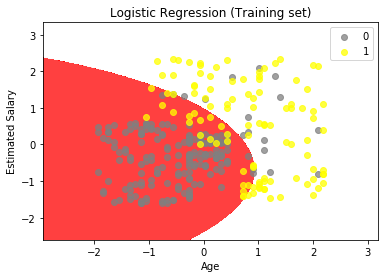

In [12]:
# Visualising the data
from matplotlib.colors import ListedColormap
x_set, y_set = x_train, Y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() -1, stop = x_set[:, 0].max() + 1, step = 0.01),
                    np.arange(start = x_set[:, 1].min() -1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
           alpha = 0.75, cmap = ListedColormap(('red', 'white')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], alpha = 0.75,
               c = ListedColormap(('gray', 'yellow'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [11]:
# predicting the test set results
y_pred = classifier.predict(x_test)
df = pd.DataFrame(y_pred)
df["test_vals"] = Y_test
df.rename(columns={0: "pred_vals"}, inplace = True)
# df

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
# help(confusion_matrix)
cm = confusion_matrix(Y_test, y_pred)
cm
'''
cm
array([[62,  1],
       [ 5, 32]], dtype=int64)
'''

array([[62,  1],
       [ 5, 32]], dtype=int64)

In [6]:
help(GaussianNB)

Help on class GaussianNB in module sklearn.naive_bayes:

class GaussianNB(BaseNB)
 |  Gaussian Naive Bayes (GaussianNB)
 |  
 |  Can perform online updates to model parameters via `partial_fit` method.
 |  For details on algorithm used to update feature means and variance online,
 |  see Stanford CS tech report STAN-CS-79-773 by Chan, Golub, and LeVeque:
 |  
 |      http://i.stanford.edu/pub/cstr/reports/cs/tr/79/773/CS-TR-79-773.pdf
 |  
 |  Read more in the :ref:`User Guide <gaussian_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  priors : array-like, shape (n_classes,)
 |      Prior probabilities of the classes. If specified the priors are not
 |      adjusted according to the data.
 |  
 |  Attributes
 |  ----------
 |  class_prior_ : array, shape (n_classes,)
 |      probability of each class.
 |  
 |  class_count_ : array, shape (n_classes,)
 |      number of training samples observed in each class.
 |  
 |  theta_ : array, shape (n_classes, n_features)
 |      mean of eac